# Notebook acesso a dados do Tesouro Direto com Python.

*Referência:* https://github.com/codigoquant/python_para_investimentos/blob/master/20_Tesouro_Direto_com_Python.ipynb

In [1]:
# Instalando as bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Definindo Máximo do Linhas e Colunas
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
# Removendo Warnings.
import warnings
warnings.filterwarnings("ignore")

## Funções para ETL de Dados do Tesouro Direto

In [4]:
# Definição das funções.
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

## Visualizando titulos disponíveis.

In [5]:
# Comando para buscar titulos.
titulos = busca_titulos_tesouro_direto()
titulos.sort_index(inplace=True)
titulos.head()

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29

In [6]:
# Quais os tipos de titulos.
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

## Análise Preços Titulos Pré

In [7]:
# Extraindo Preços dos Titulos Pré.
pre2025 = titulos.loc[('Tesouro Prefixado', '2025-01-01')]
pre2025

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2018-02-07,9.77,9.89,526.93,522.99,522.79
2018-02-08,9.80,9.92,526.13,522.20,522.01
2018-02-09,9.86,9.98,524.36,520.44,520.25
2018-02-14,9.86,9.98,524.55,520.64,520.44
2018-02-15,9.86,9.98,524.75,520.84,520.64
...,...,...,...,...,...
2023-10-09,10.91,11.03,880.75,879.22,879.22
2023-10-10,10.77,10.89,882.48,880.95,880.95
2023-10-11,10.65,10.77,884.00,882.48,882.48


In [8]:
# Medidas Resumo.
pre2025[['Taxa Compra Manha','PU Compra Manha']].describe().T

,count,mean,std,min,25%,50%,75%,max
Taxa Compra Manha,1416.0,9.438602,2.346074,5.34,6.9600,9.61,11.6225,13.91
PU Compra Manha,1416.0,714.133242,98.072809,474.26,688.2375,738.67,772.8300,884.00


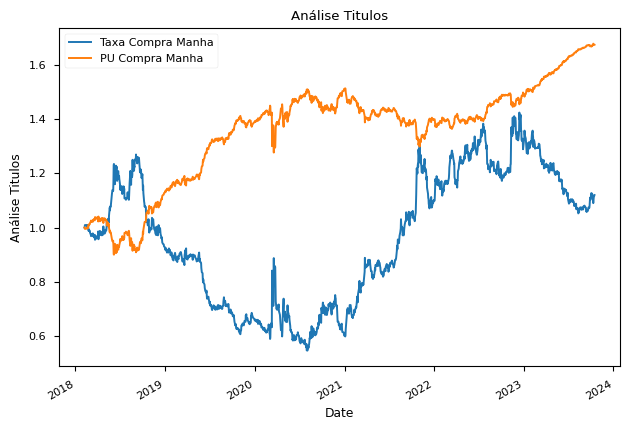

In [9]:
# Visualização gráfica das séries.
plt.style.use('seaborn-paper')
(pre2025['Taxa Compra Manha'] / pre2025['Taxa Compra Manha'].iloc[0]).plot()
(pre2025['PU Compra Manha'] / pre2025['PU Compra Manha'].iloc[0]).plot()
plt.legend(loc='best')
plt.title("Análise Titulos")
plt.xlabel('Date')
plt.ylabel('Análise Titulos')
plt.tight_layout()
plt.show()